### Project Name: Lending Club Case Study

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [636]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Data Sourcing and loading

In [637]:
# Reading Dataset
loan_df = pd.read_csv("loan.csv")

#view sample data
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [638]:
# View Dataframe information such as,
# RangeIndex - Total number of records - 39717
# Number of Columns - 111 and their Datatypes 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Fix Rows and Columns

In [639]:
# Checking for Incorrect rows, Summary rows, Blank rows
loan_df[loan_df['id'].isna()]
# Each row has an id and other column values, hence no incorrect, summary or blank rows are found

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

In [640]:
# Get the column names
column_names = loan_df.columns

# Check if any column names are null, Nan or empty
missing_columns = column_names[column_names.isna() | column_names.isnull() | (column_names == '')]

missing_columns.shape
# No missing column names found

column_names.is_unique
# Each column has a unique name

True

In [641]:
# Manual checks are performed on the data frame for column validity
# No columns containing Multiple data values
# No Misaligned columns or Shifted columns

#### Data Understanding

In [642]:
# Points from Data Dictionary - considered the below columns
# verification_status - Verified > source verified > not verified
# Grade and Sub Grade - A > B > C > D and 1 > 2 > 3 > 4
# Home Ownership - Own > mortgage > rent > others
# loan status - fully paid > current > charged off
# dti - debt to income ration - it should be low and value ranges from 0 - 100% - 0 or low
# delinq_2yrs - 0 or low
# inq_last_6mths - credit score inquiries - 0 or low
# mths_since_last_delinq - NA or high
# mths_since_last_record - NA or high
# open_acc - NA or low
# pub_rec - NA or low
# revol_bal - 0 or less
# revol_util - 0 or less
# total_acc - it should be high
# total_rec_late_fee - 0 or low
# recoveries - 0 or low
# collection_recovery_fee - 0 or low
# application_type 
# dti_joint 
# verification_status_joint
# acc_now_delinq
# pub_rec_bankruptcies
# tax_liens

# =====================
# finalized columns
# =====================
# id
# loan_amnt
# term
# int_rate
# installment
# grade
# sub_grade
# emp_length
# home_ownership
# annual_inc
# verification_status
# issue_d
# loan_status
# purpose
# addr_state
# dti
# open_acc
# revol_bal
# revol_util
# total_acc

#### Data Cleanup

In [643]:
cleaned_loan_df = loan_df[["id", "loan_amnt", "term", "int_rate", "installment", "grade", "sub_grade", "emp_length",  "home_ownership", "annual_inc", "verification_status", "issue_d", "loan_status", "purpose", "addr_state", "dti", "open_acc", "revol_bal", "revol_util", "total_acc"]]

In [644]:
cleaned_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [645]:
# term - remove word - months and spaces
cleaned_loan_df["term"] = cleaned_loan_df["term"].apply(lambda x: int(x.strip()[:2]))

In [646]:
cleaned_loan_df["int_rate"] = cleaned_loan_df["int_rate"].apply(lambda x: float(x.strip()[:-1]))

In [647]:
cleaned_loan_df["issue_month"] = pd.to_datetime(cleaned_loan_df["issue_d"],format='%b-%y').dt.month
cleaned_loan_df["issue_year"] = pd.to_datetime(cleaned_loan_df["issue_d"],format='%b-%y').dt.year

In [649]:
# removing rows with loan_status = "Current"
# As these loans will not help in identifiying defaulters

cleaned_loan_df = cleaned_loan_df[cleaned_loan_df["loan_status"] != "Current"]

##### Single fields validation

In [650]:
# term should be either 36 months or 60 months
# grades - A to G
# home_ownership - 'OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'
# verification_status - "Verified", "Source Verified", "Not Verified"
# issue_d should be a valid date
# revol_bal - it should be non-negative
# revol_util - it should be between 0% to 100%

In [651]:
# term should be either 36 months or 60 months
cleaned_loan_df[~ ((cleaned_loan_df["term"] == 36) | (cleaned_loan_df["term"] == 60)) ]

Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, open_acc, revol_bal, revol_util, total_acc, issue_month, issue_year]
Index: []

[0 rows x 22 columns]

In [652]:
# grades - A to G
cleaned_loan_df[~ (cleaned_loan_df["grade"].isin(['A','B','C','D','E','F','G'])) ]

Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, open_acc, revol_bal, revol_util, total_acc, issue_month, issue_year]
Index: []

[0 rows x 22 columns]

In [653]:
# home_ownership - 'OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'
cleaned_loan_df[~ (cleaned_loan_df["home_ownership"].isin(['OWN', 'MORTGAGE', 'RENT', 'OTHER'])) ]
# There are 3 Fully Paid loans with home_ownership as NONE.
# We will remove these 3 loans as they are Fully Paid and not contributing significantly towards defaulters.
cleaned_loan_df = cleaned_loan_df[(cleaned_loan_df["home_ownership"].isin(['OWN', 'MORTGAGE', 'RENT', 'OTHER'])) ]

In [655]:
# verification_status - "Verified", "Source Verified", "Not Verified"
cleaned_loan_df[~(cleaned_loan_df['verification_status'].isin(['Verified','Source Verified','Not Verified']))]

Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, open_acc, revol_bal, revol_util, total_acc, issue_month, issue_year]
Index: []

[0 rows x 22 columns]

In [656]:
# issue_d should be valid date
cleaned_loan_df[ ~ (
                cleaned_loan_df["issue_year"].isin([2007,2008,2009,2010,2011])
                ) ]

Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, open_acc, revol_bal, revol_util, total_acc, issue_month, issue_year]
Index: []

[0 rows x 22 columns]

In [658]:
# revol_bal - it should be non-negative
cleaned_loan_df[ cleaned_loan_df["revol_bal"] < 0 ]

Empty DataFrame
Columns: [id, loan_amnt, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, open_acc, revol_bal, revol_util, total_acc, issue_month, issue_year]
Index: []

[0 rows x 22 columns]

In [661]:
cleaned_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38574 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38574 non-null  int64  
 1   loan_amnt            38574 non-null  int64  
 2   term                 38574 non-null  int64  
 3   int_rate             38574 non-null  float64
 4   installment          38574 non-null  float64
 5   grade                38574 non-null  object 
 6   sub_grade            38574 non-null  object 
 7   emp_length           37541 non-null  object 
 8   home_ownership       38574 non-null  object 
 9   annual_inc           38574 non-null  float64
 10  verification_status  38574 non-null  object 
 11  issue_d              38574 non-null  object 
 12  loan_status          38574 non-null  object 
 13  purpose              38574 non-null  object 
 14  addr_state           38574 non-null  object 
 15  dti                  38574 non-null  floa

##### Removing outliers on numerical columns

In [662]:
# Considering the numerical columns from the dataframe to identify and remove outliers.
numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

In [663]:
cleaned_loan_df.shape

(38574, 22)

In [664]:
# Function to remove outliers using the IQR method
def remove_outliers(cleaned_loan_df, columns):
    for col in columns:
        Q1 = cleaned_loan_df[col].quantile(0.25)
        Q3 = cleaned_loan_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_loan_df = cleaned_loan_df[(cleaned_loan_df[col] >= lower_bound) & (cleaned_loan_df[col] <= upper_bound)]
    return cleaned_loan_df

In [665]:
# removing the outliers from the data frame w.r.t all the numerical columns
cleaned_loan_df = remove_outliers(cleaned_loan_df, numerical_cols)
cleaned_loan_df.shape

(34717, 22)

In [666]:
cleaned_loan_df[cleaned_loan_df["loan_status"] == 'Charged Off'].shape

(5025, 22)

#### Data Filtering

In [667]:
charged_off_loan_df = cleaned_loan_df[cleaned_loan_df["loan_status"] == 'Charged Off']
charged_off_loan_df.shape

(5025, 22)

In [668]:
fully_paid_loan_df = cleaned_loan_df[cleaned_loan_df["loan_status"] == 'Fully Paid']
fully_paid_loan_df.shape

(29692, 22)

#### Univariate Analysis, Segmented Univariate and Bivariate Analysis

In [669]:
charged_off_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5025 entries, 1 to 39678
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5025 non-null   int64  
 1   loan_amnt            5025 non-null   int64  
 2   term                 5025 non-null   int64  
 3   int_rate             5025 non-null   float64
 4   installment          5025 non-null   float64
 5   grade                5025 non-null   object 
 6   sub_grade            5025 non-null   object 
 7   emp_length           4806 non-null   object 
 8   home_ownership       5025 non-null   object 
 9   annual_inc           5025 non-null   float64
 10  verification_status  5025 non-null   object 
 11  issue_d              5025 non-null   object 
 12  loan_status          5025 non-null   object 
 13  purpose              5025 non-null   object 
 14  addr_state           5025 non-null   object 
 15  dti                  5025 non-null   float

In [672]:
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']

##### Univariate Analysis

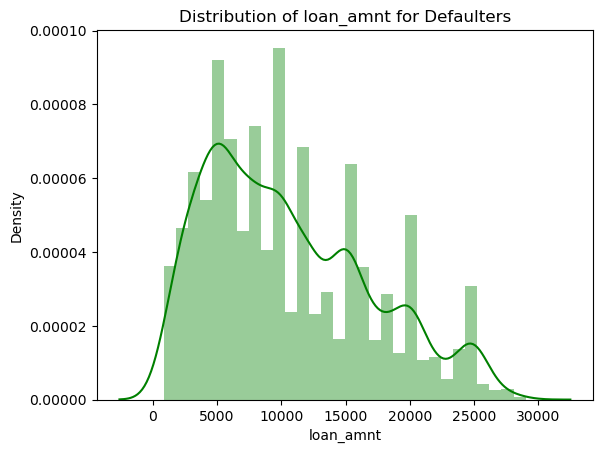

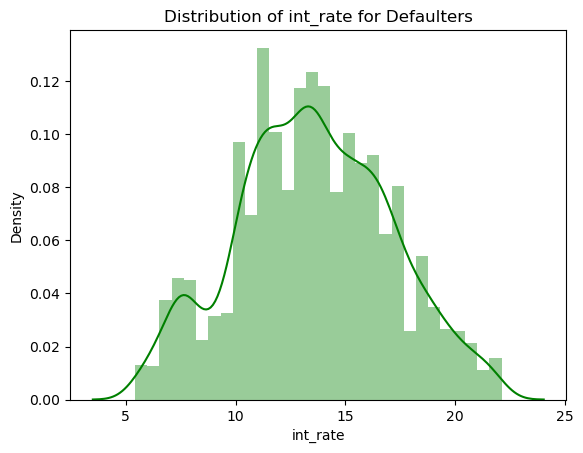

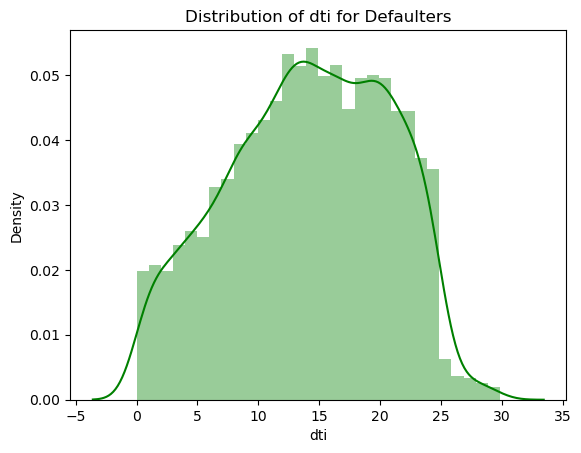

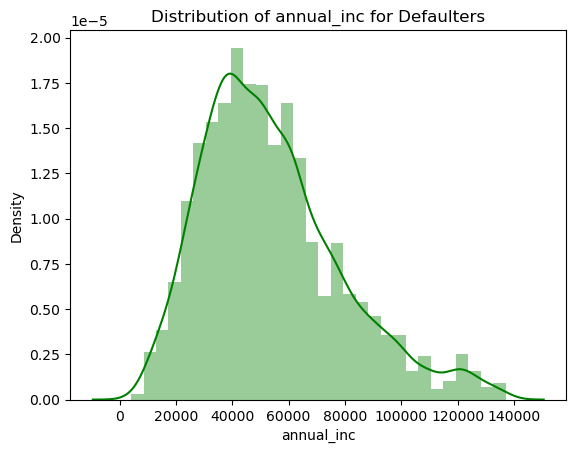

In [674]:
for column in numerical_columns:
    sns.distplot(charged_off_loan_df[column], bins=30, color='g')
    plt.title(f'Distribution of {column} for Defaulters')
    plt.show()

### Following are the observations from the plots plotted.    
# The number of defaulters with Loan Amounts ranging from 3k to 12k are more.
# Loan applicants with Annual Income ranging from 2k to 8k are many defaulters.
# The number of loan defaulters is increasing with an increase in DTI value
# The number of loan defaulters is increasing around interest rates 10% to 18%

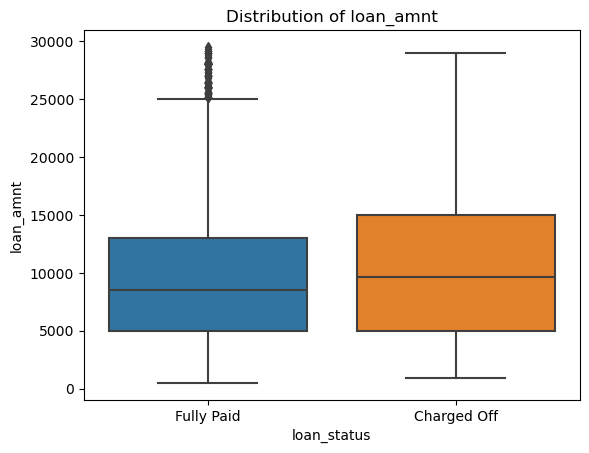

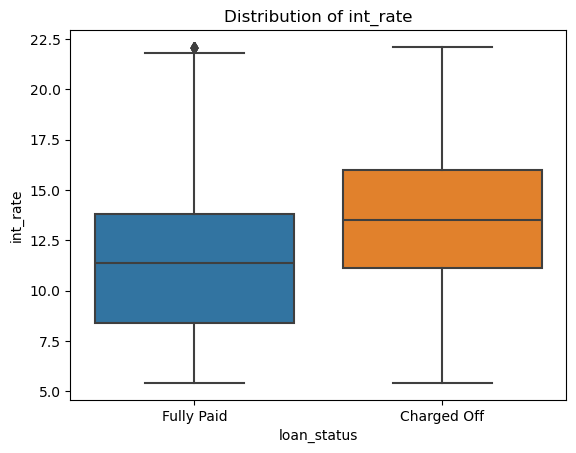

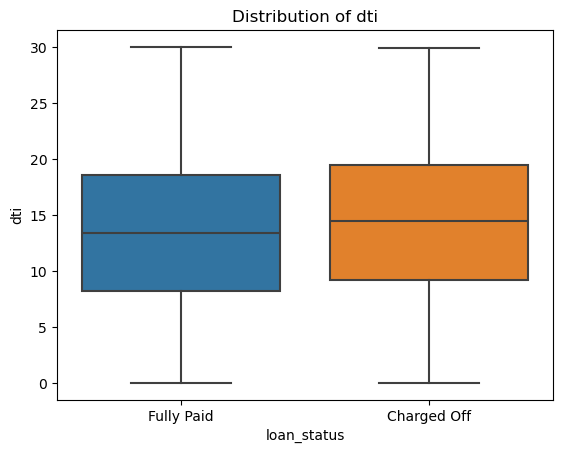

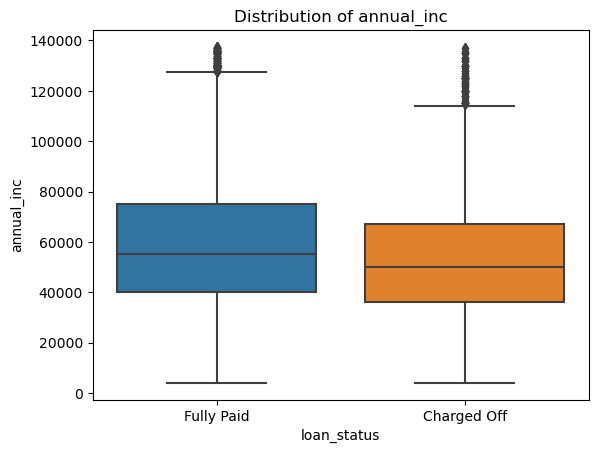

In [676]:
#Box Plots
for column in numerical_columns:
    sns.boxplot(x = cleaned_loan_df["loan_status"], y=cleaned_loan_df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

### Following are the observations from the plots plotted.     
# The distribution of loan status is even with the loan amount spread. 
# The inst_rate of the loans with loan status defaulters is high compared to fully paid.

In [677]:
categorical_columns = ['home_ownership', 'verification_status', 'purpose', 'emp_length', 'grade', 'term', 'addr_state']

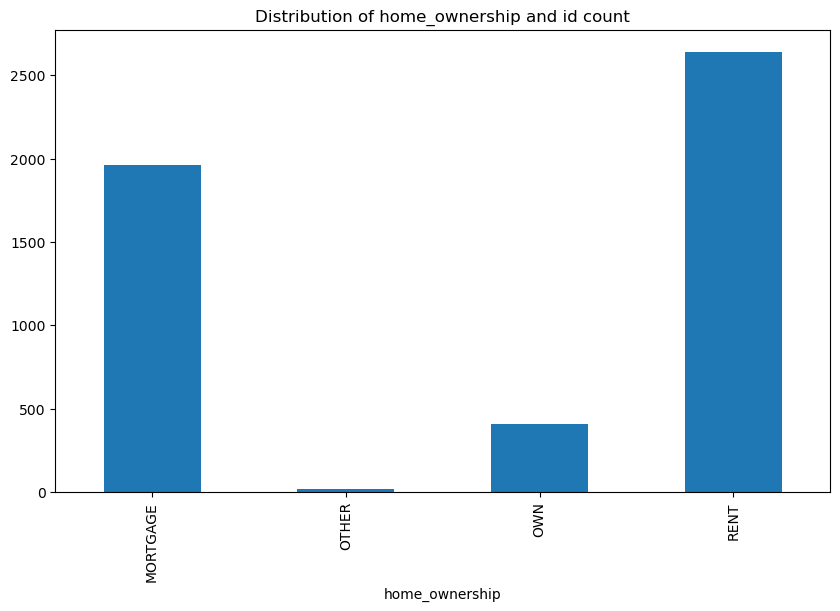

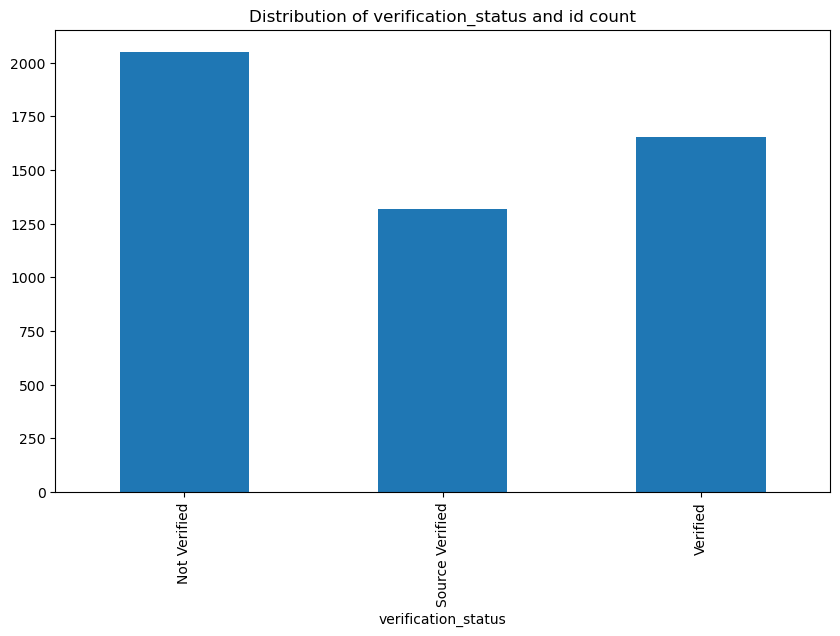

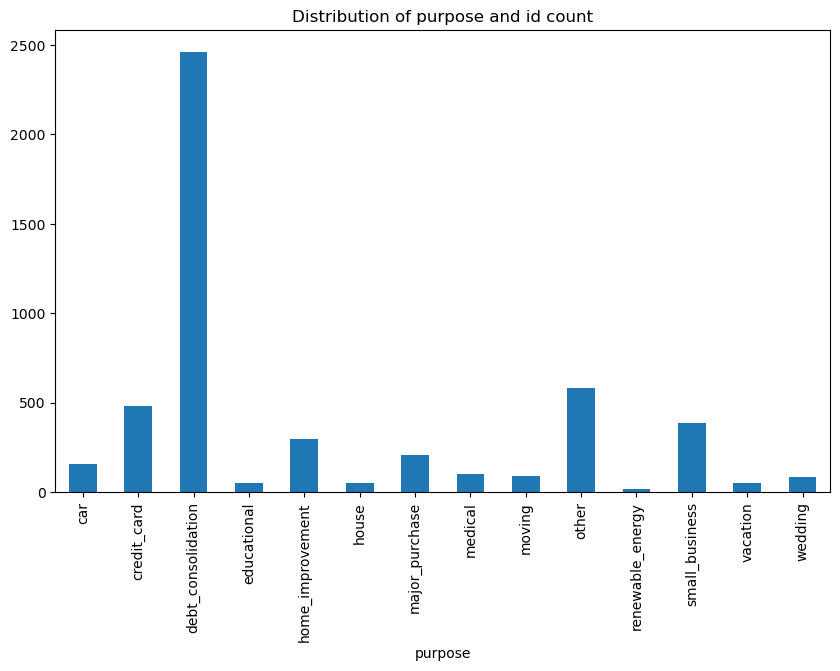

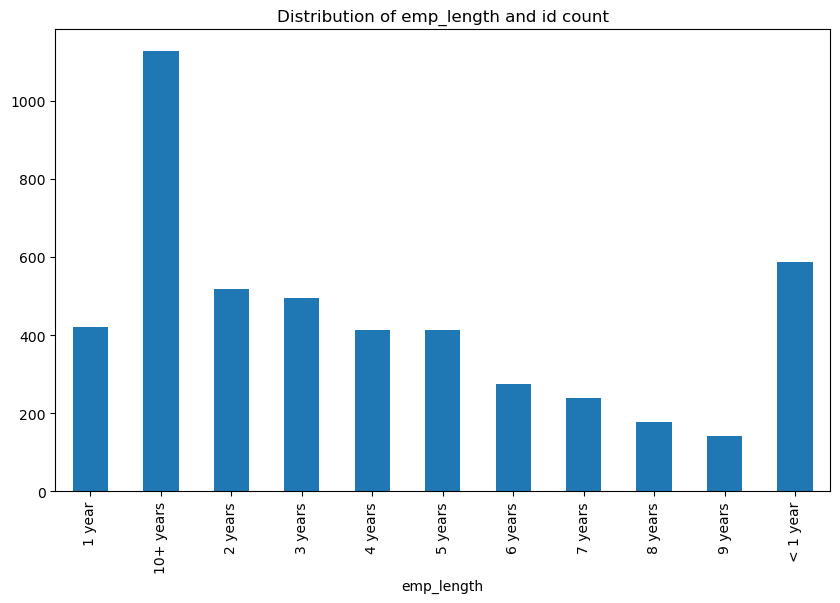

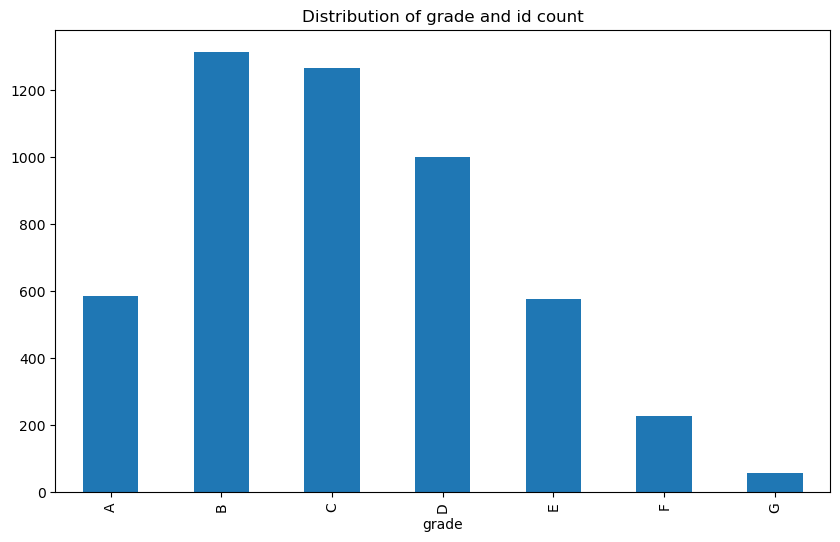

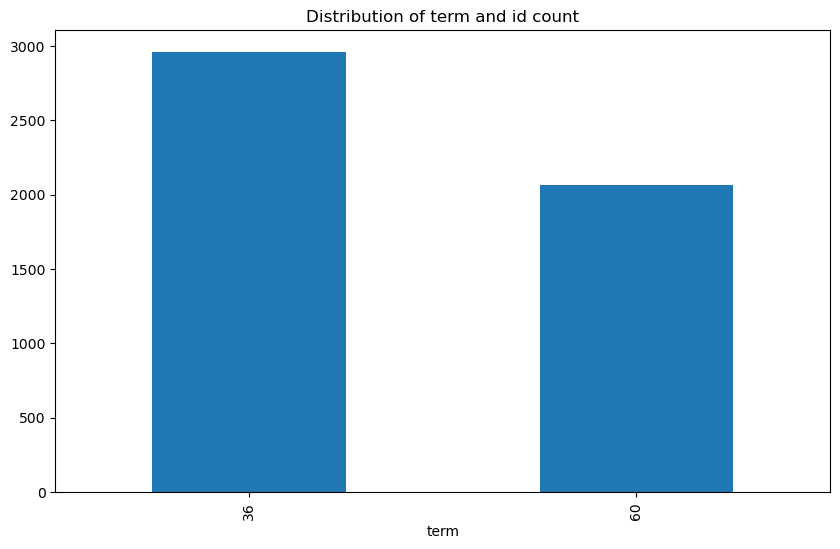

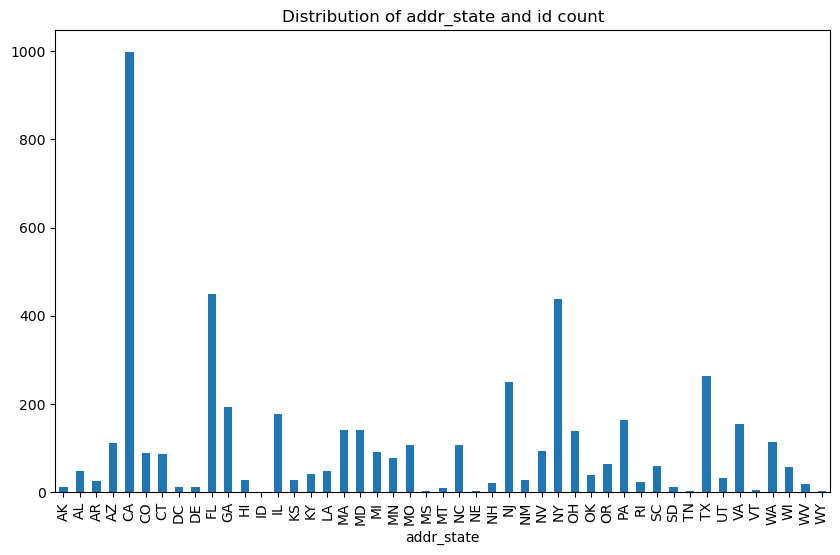

In [679]:
# Bar plots
for cat_column in categorical_columns:
    plt.figure(figsize=(10, 6))
    charged_off_loan_df.groupby(by=charged_off_loan_df[cat_column])['id'].count().plot.bar() 
    plt.title(f'Distribution of {cat_column} and id count')
    plt.show()

### Following are the observations from the plots plotted.     
# The number of defaulters with Homeownership value is in the order RENT > MORTGAGE > OWN > OTHER
# The number of defaulters with Verification Status value is in the order Not Verified >  Verified > Source Verified
# The number of defaulters with Purpose value debt_consolidation is very high
# The number of defaulters with Employee length value of 10+ years is very high
# The number of defaulters with Grade value is in the order B > C > D > A > E > F > G
# The number of defaulters with a term value of 36 months is greater than 60 months
# The number of defaulters with an address state CA exceeds other states. The order of states for defaulters is CA > FL > NY > TX > NJ

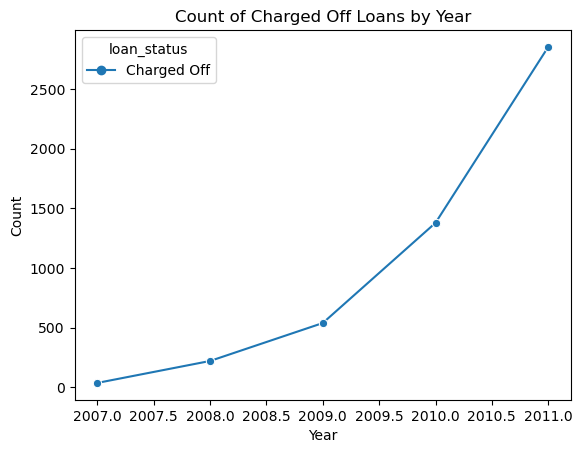

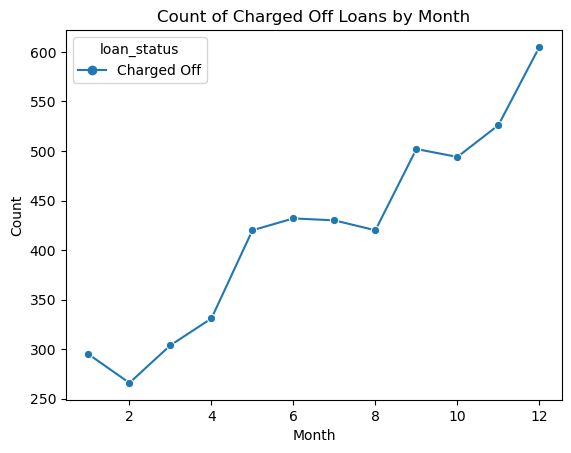

In [680]:
# The Number of loan applications increasing yearly and monthly within each year

#Time dependent plot with issue year
grouped_by_year=charged_off_loan_df.pivot_table(index="issue_year", columns="loan_status", values="id", aggfunc='count')
sns.lineplot(data=grouped_by_year, markers=True)
plt.title('Count of Charged Off Loans by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#Time dependent plot with issue month
grouped_by_year=charged_off_loan_df.pivot_table(index="issue_month", columns="loan_status", values="id", aggfunc='count')
sns.lineplot(data=grouped_by_year, markers=True)
plt.title('Count of Charged Off Loans by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Following are the observations from the plots plotted. 
# Observing the number of defaulters is increasing monthly.
# Observing the number of defaulters is increasing yearly.

##### Bivariate analysis

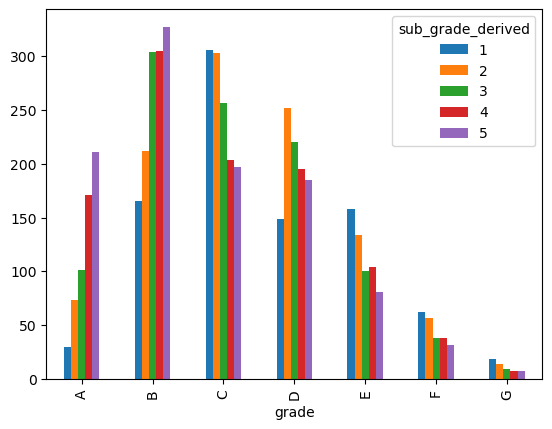

In [681]:
# From the above Bar plot for the Grade category, we are plotting against subgrades within each grade to identify patterns.
# Below bivariate analysis and plotting involves 2 columns, grades and sub_grade.

derived_grade_charged_off_loan_df = charged_off_loan_df[['id' , 'grade', 'sub_grade']]
derived_grade_charged_off_loan_df["sub_grade_derived"] = derived_grade_charged_off_loan_df["sub_grade"].apply(lambda x : x[1:])
derived_grade_charged_off_loan_df_pivot = derived_grade_charged_off_loan_df.pivot_table(index = "grade", columns = "sub_grade_derived", values = "id", aggfunc='count')
derived_grade_charged_off_loan_df_pivot.plot(kind="bar")
plt.show()

### Following are the observations from the plots plotted. 
# There are more number of defaulters in B and C grades.
# B3, B4, B5, C1, C2 and C3 sub graded loan applicants are more defaulters.

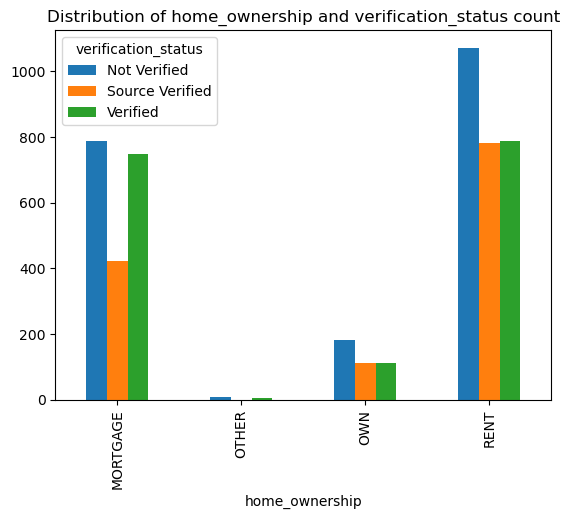

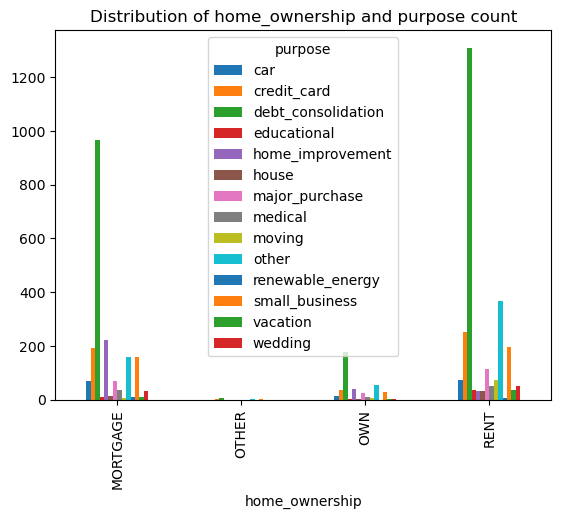

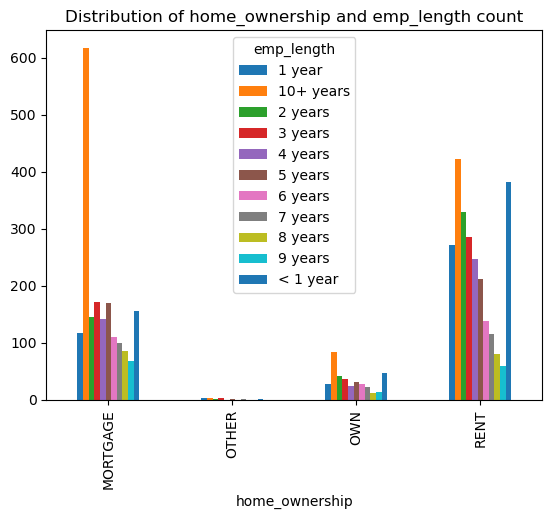

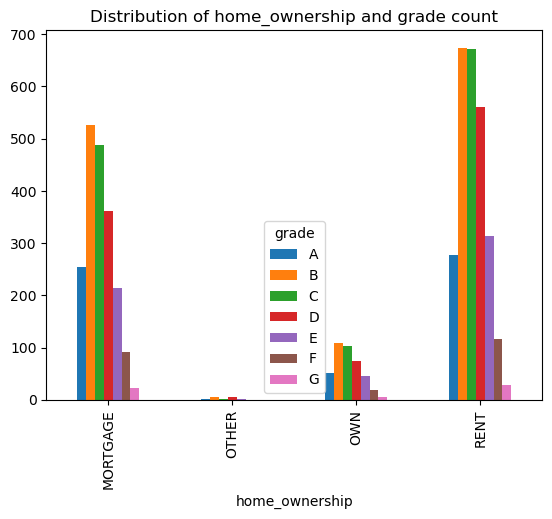

In [685]:
# From the above plots, we see patterns for home ownership values for defaulters, 
# Hence analyzing home ownership with other categories for the more significant patterns

columns_with_home_ownership_for_analysis = ['verification_status', 'purpose', 'emp_length', 'grade']
for col in columns_with_home_ownership_for_analysis:
    temp_pivot_table = charged_off_loan_df.pivot_table(index = "home_ownership", columns = col, values = "id", aggfunc='count')
    temp_pivot_table.plot(kind="bar")
    plt.title(f'Distribution of home_ownership and {col} count')
    plt.show()

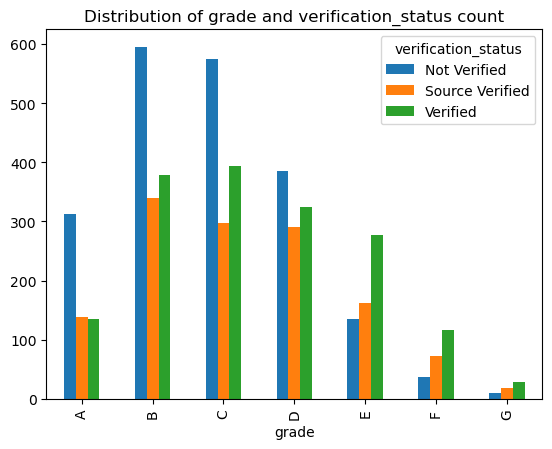

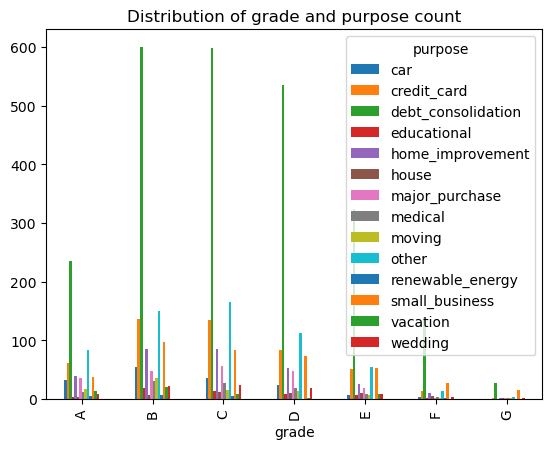

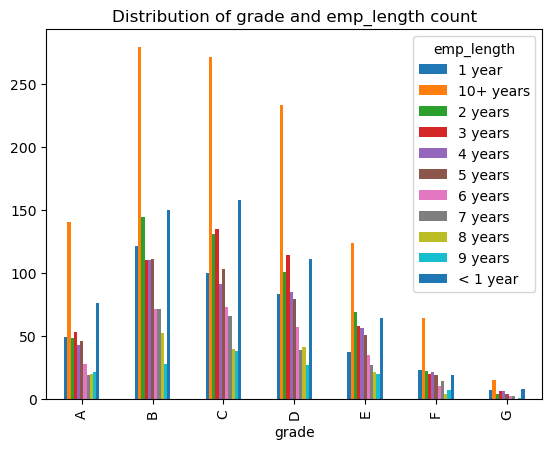

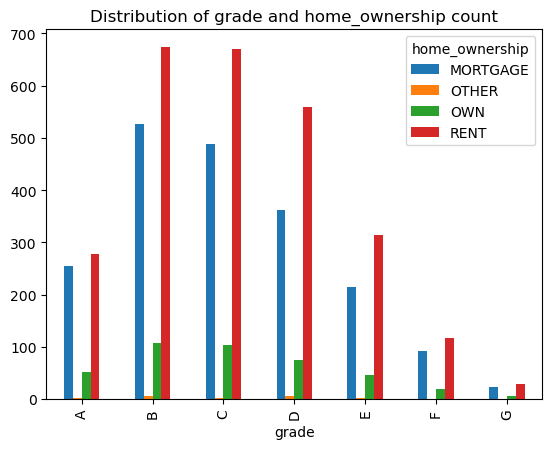

In [686]:
# From the above plots, we see patterns with grades for defaulters, 
# Hence analyzing the grades with other categories for the more significant patterns
columns_with_grades_for_analysis = ['verification_status', 'purpose', 'emp_length', 'home_ownership']
for col in columns_with_grades_for_analysis:
    temp_pivot_table = charged_off_loan_df.pivot_table(index = "grade", columns = col, values = "id", aggfunc='count')
    temp_pivot_table.plot(kind="bar")
    plt.title(f'Distribution of grade and {col} count')
    plt.show()

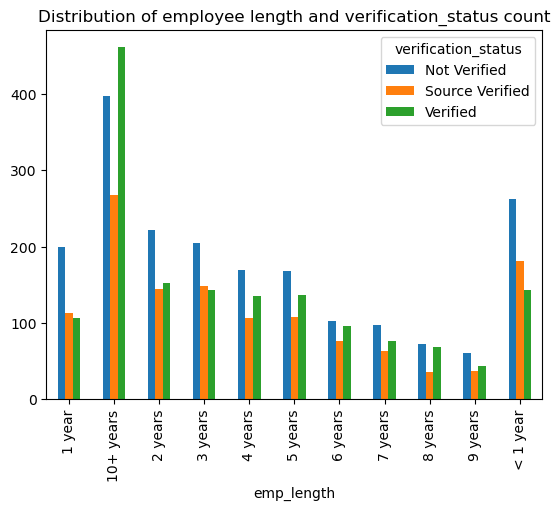

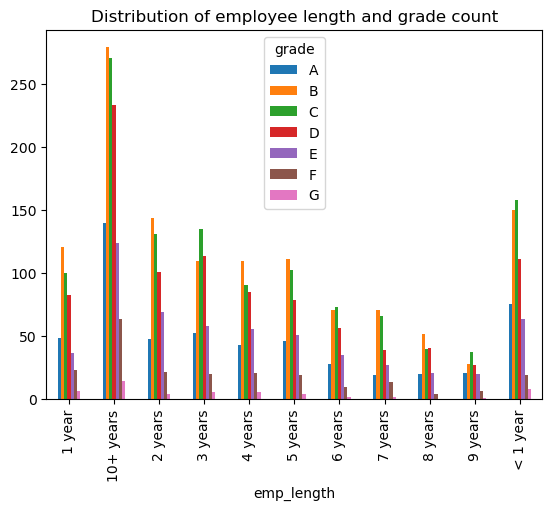

In [687]:
# From the above plots, we see patterns with the emp length for defaulters, 
# Hence analyzing the emp length with other categories for the more significant patterns
columns_with_emp_length_for_analysis = ['verification_status', 'grade']
for col in columns_with_emp_length_for_analysis:
    temp_pivot_table = charged_off_loan_df.pivot_table(index = "emp_length", columns = col, values = "id", aggfunc='count')
    temp_pivot_table.plot(kind="bar")
    plt.title(f'Distribution of employee length and {col} count')
    plt.show()

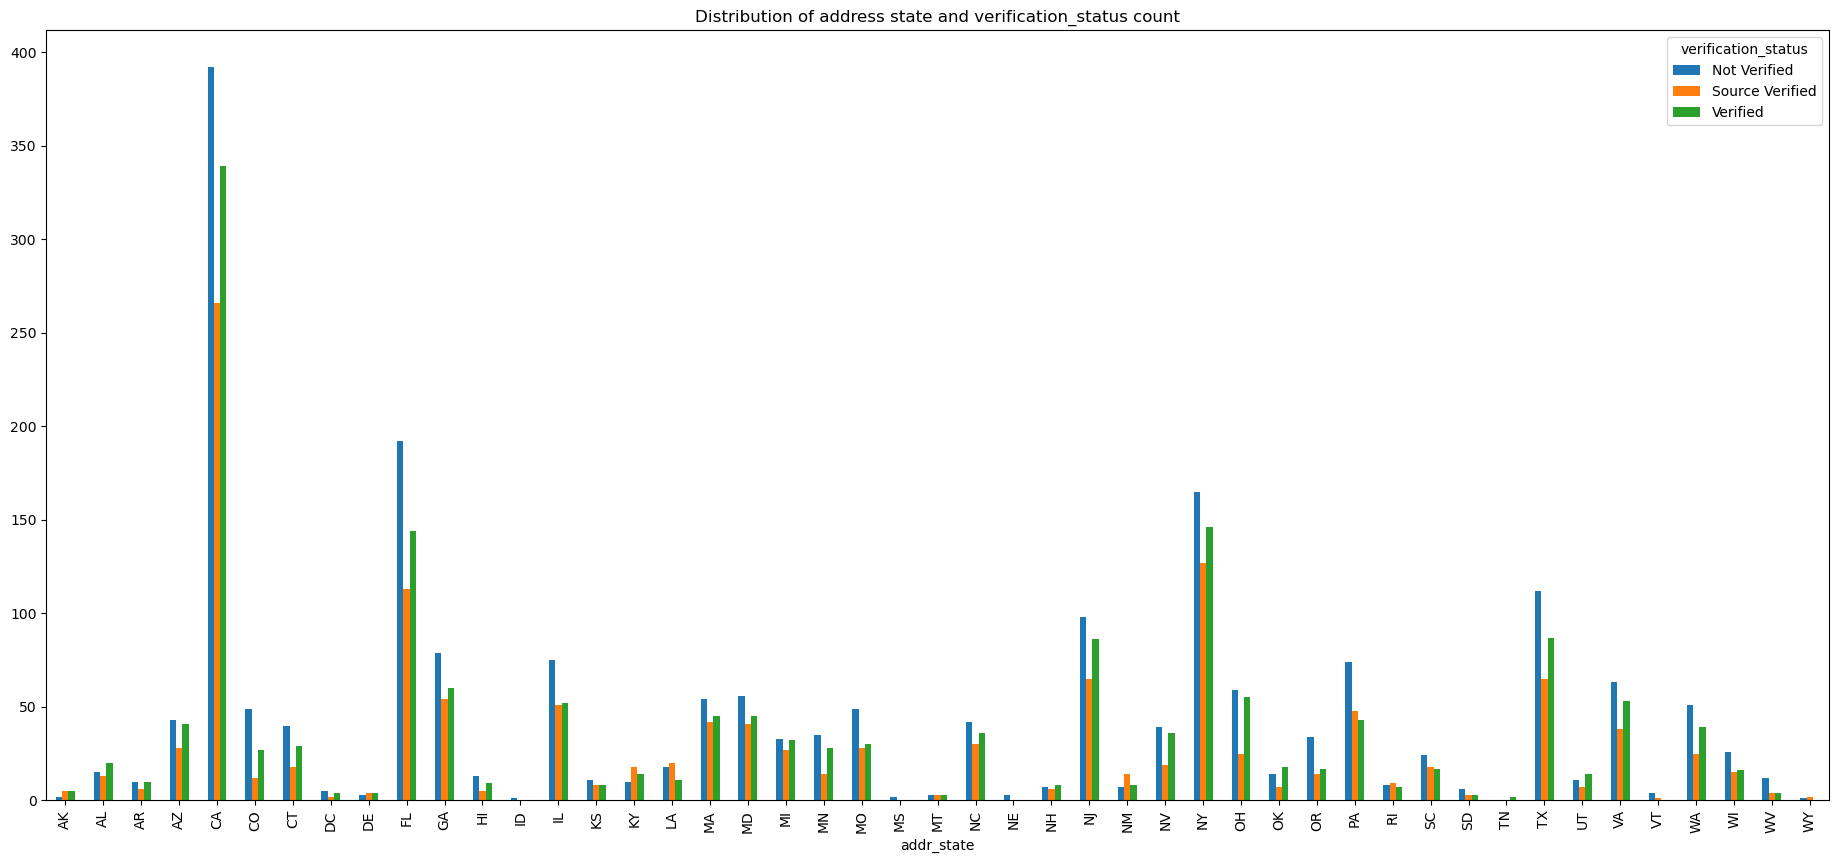

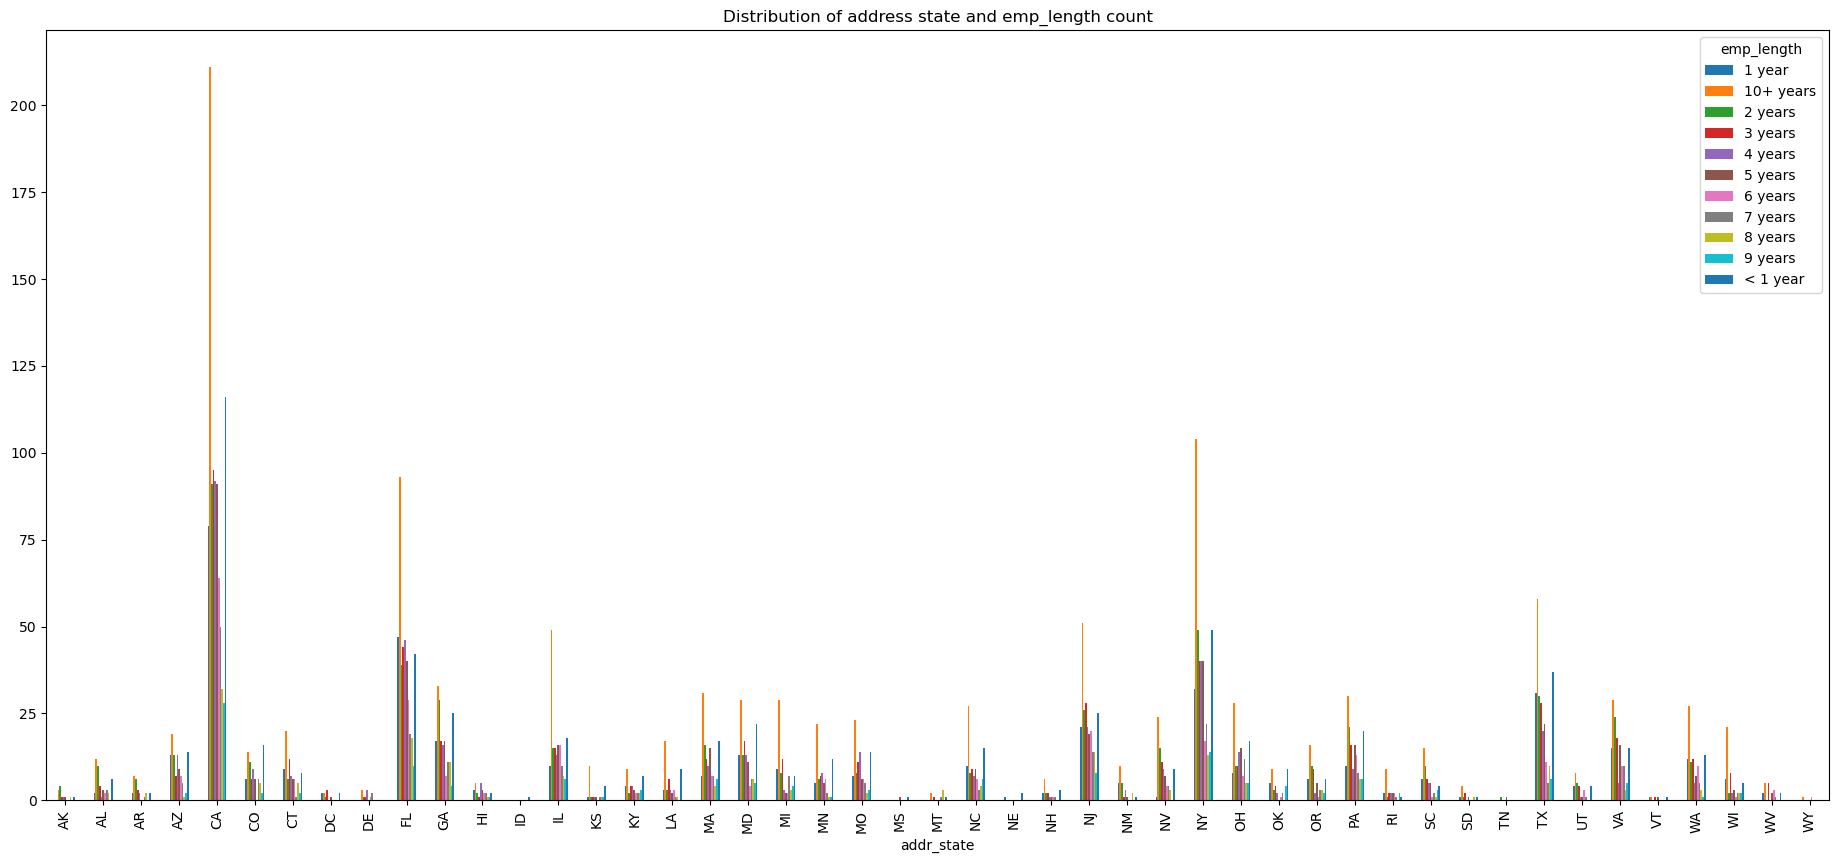

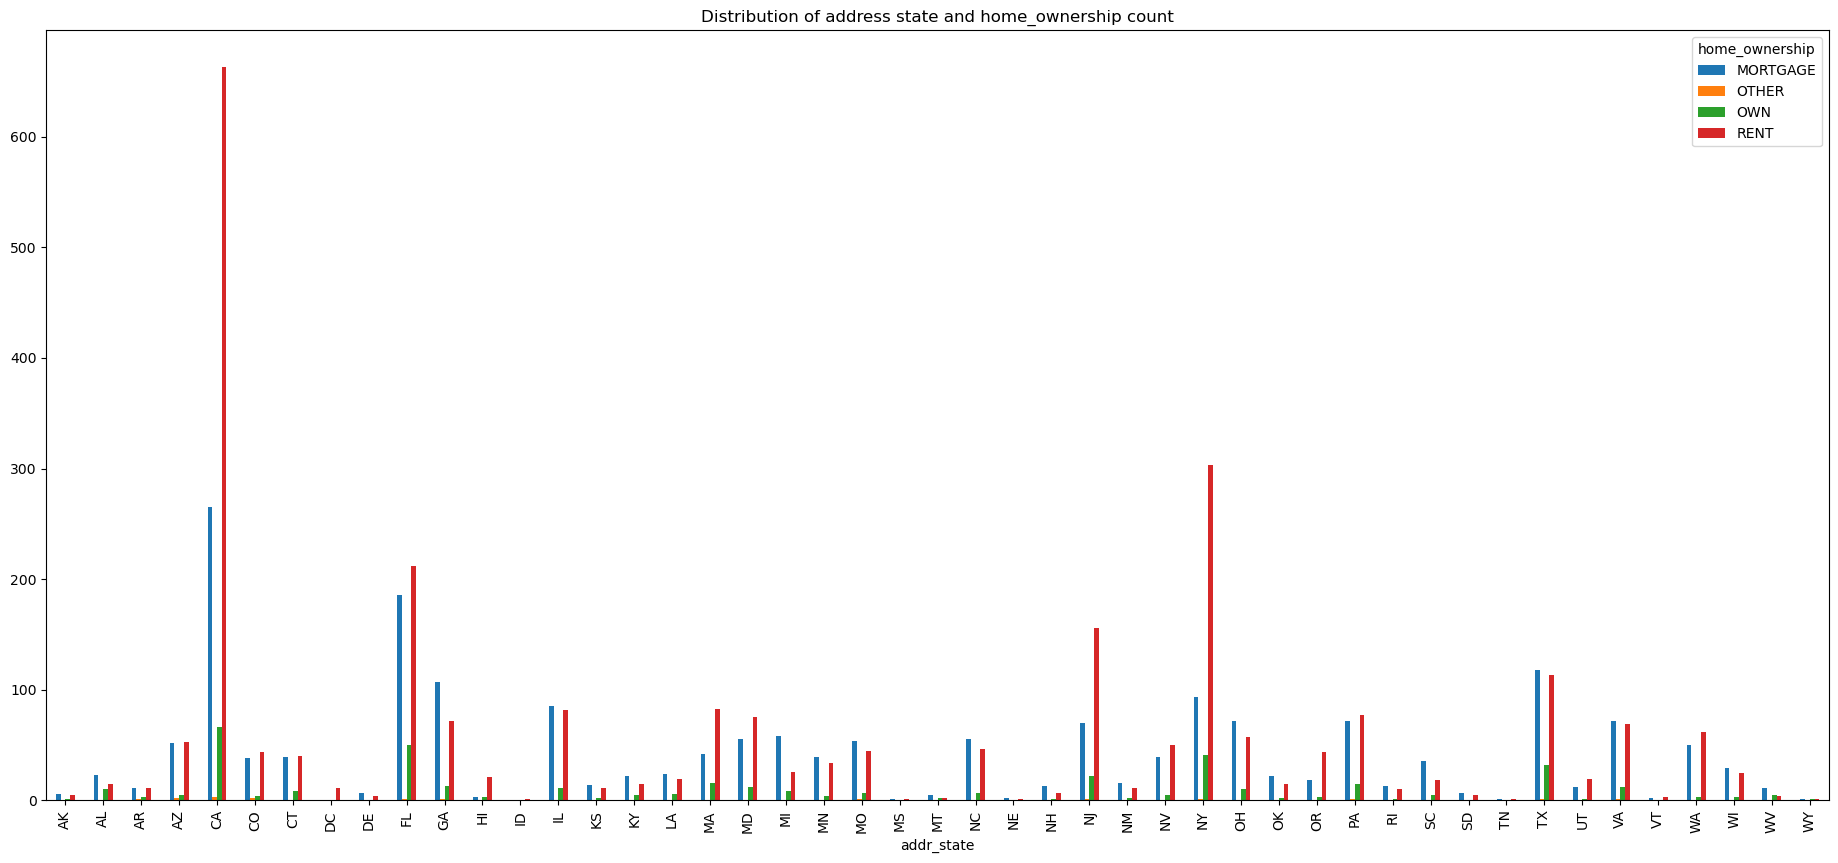

In [688]:
# From the above plots, we see patterns with the address state for defaulters, 
# Hence analyzing the address state with other categories for the more significant patterns
columns_with_addr_states_for_analysis = ['verification_status', 'emp_length', 'home_ownership']
for col in columns_with_addr_states_for_analysis:
    temp_pivot_table = charged_off_loan_df.pivot_table(index = "addr_state", columns = col, values = "id", aggfunc='count')
    temp_pivot_table.plot(kind="bar", figsize=(23, 10))
    plt.title(f'Distribution of address state and {col} count')
    plt.show()
# With the plot below, we observe that verification status with the value Not Verified are more defaulters across many states.
# With the plot below, we observe that employee length with values of 10+ years and less than 1 year are more defaulters across many states.
# With the plot below, we observe that home ownership with values of RENT are more defaulters across many states. In the state CA, RENT home ownership defaulters are more.

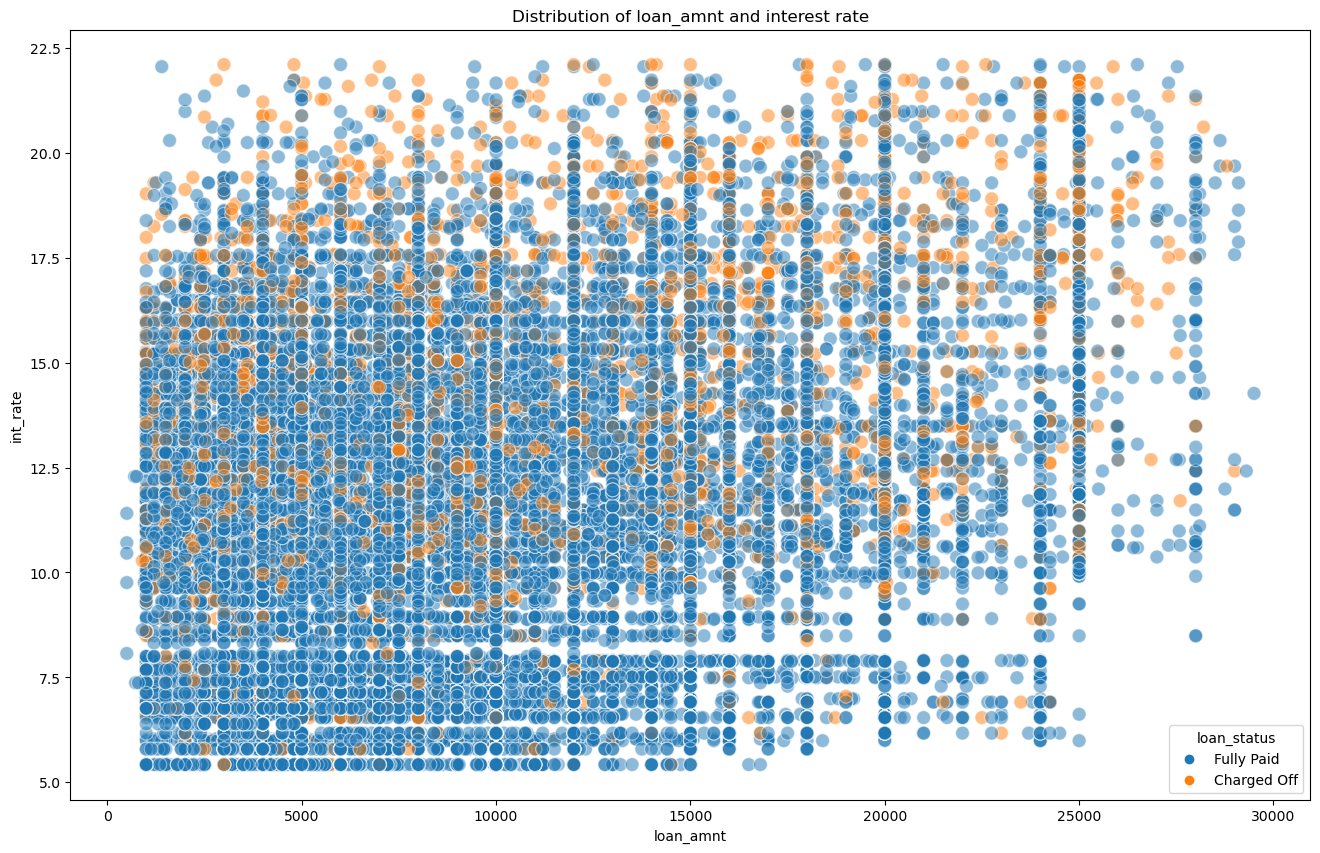

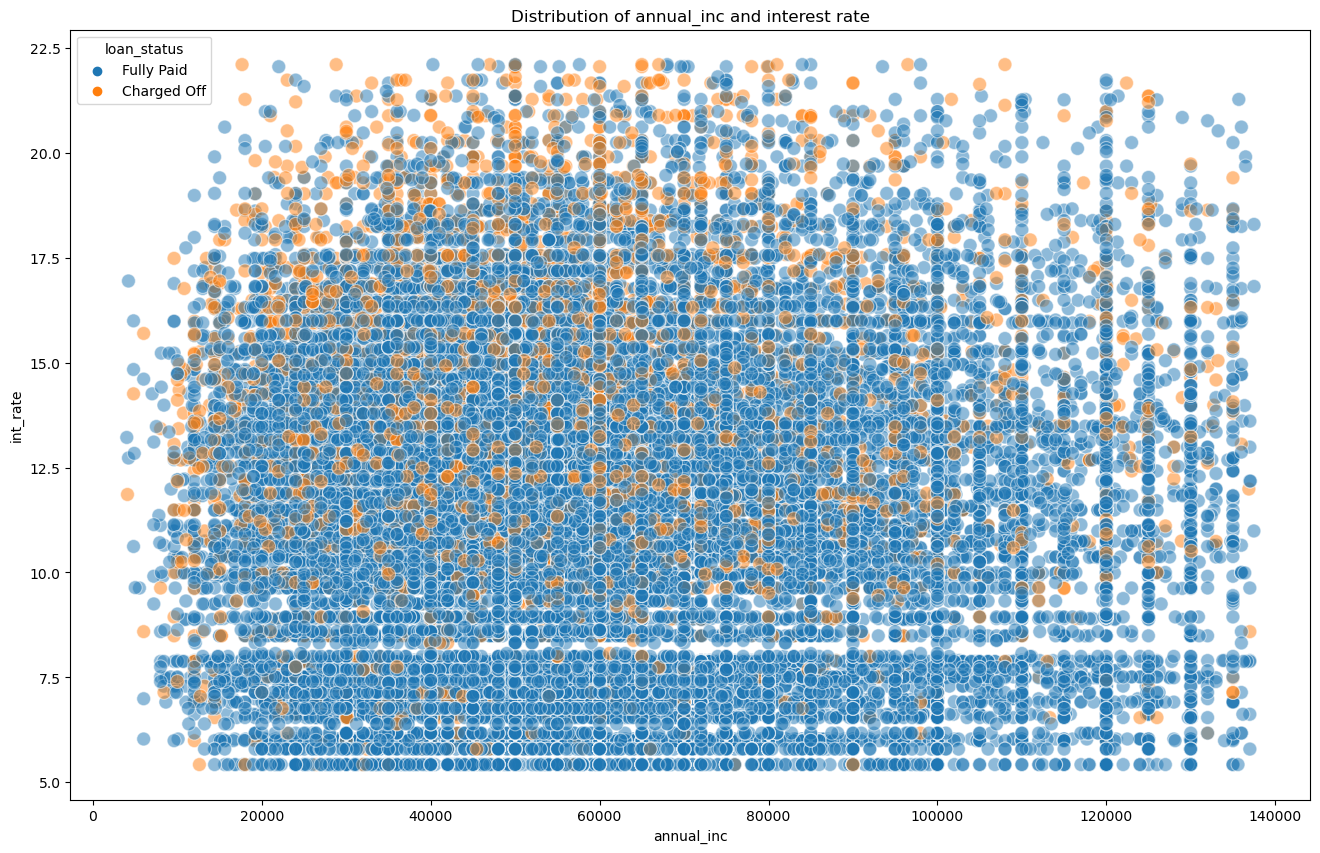

In [689]:
# Analyzing the patterns for defaulters with facts/numericals present in the data. 
# Analyzing the data for both fully paid and defaulters to observe patterns
#Scatter plot
numerical_columns_for_scatter_plot = ['loan_amnt', 'annual_inc']
for column_1 in numerical_columns_for_scatter_plot:
        plt.figure(figsize=(16, 10))
        sns.scatterplot(data = cleaned_loan_df, x=column_1, y="int_rate", hue='loan_status', alpha=0.5, s=100)
        plt.title(f'Distribution of {column_1} and interest rate')
        plt.show()
# As the interest rate increases, the number of defaulters increases. Irrespective of the annual income and loan amount.
# Observing the increase in defaulters with interest rates more than or equal to 12.5%
# Low Annual income applicants are more likely to be defaulters compared to applicants with high annual income.

In [690]:
# To find the correlation between the column values, plotting a heat map by deriving correlation matrix
# heatmap for charged off loans 
charged_off_loan_for_corr_matrix = charged_off_loan_df[['loan_amnt', 'int_rate', 'grade', 'sub_grade', 'annual_inc', 'dti']]
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
subgrade_mapping = {'A1': 35, 'A2': 34, 'A3': 33, 'A4': 32, 'A5': 31, 
                    'B1': 30, 'B2': 29, 'B3': 28, 'B4': 27, 'B5': 26,
                    'C1': 25, 'C2': 24, 'C3': 23, 'C4': 22, 'C5': 21,
                    'D1': 20, 'D2': 19, 'D3': 18, 'D4': 17, 'D5': 16,
                    'E1': 15, 'E2': 14, 'E3': 13, 'E4': 12, 'E5': 11,
                    'F1': 10, 'F2': 9, 'F3': 8, 'F4': 7, 'F5': 6,
                    'G1': 5, 'G2': 4, 'G3': 3, 'G4': 2, 'G5': 1}

charged_off_loan_for_corr_matrix['grade_numeric'] = charged_off_loan_for_corr_matrix['grade'].map(grade_mapping)
charged_off_loan_for_corr_matrix['subgrade_numeric'] = charged_off_loan_for_corr_matrix['sub_grade'].map(subgrade_mapping)
charged_off_loan_for_corr_matrix = charged_off_loan_for_corr_matrix.drop(columns=['grade', 'sub_grade'])

correlation_matrix_for_charged_off = charged_off_loan_for_corr_matrix.corr()
correlation_matrix_for_charged_off

loan_amnt  int_rate  annual_inc       dti  grade_numeric  \
loan_amnt          1.000000  0.291852    0.377635  0.091561      -0.269473   
int_rate           0.291852  1.000000    0.103599  0.030137      -0.942634   
annual_inc         0.377635  0.103599    1.000000 -0.025501      -0.107253   
dti                0.091561  0.030137   -0.025501  1.000000      -0.008889   
grade_numeric     -0.269473 -0.942634   -0.107253 -0.008889       1.000000   
subgrade_numeric  -0.283088 -0.955265   -0.112420 -0.014669       0.979946   

                  subgrade_numeric  
loan_amnt                -0.283088  
int_rate                 -0.955265  
annual_inc               -0.112420  
dti                      -0.014669  
grade_numeric             0.979946  
subgrade_numeric          1.000000

<Axes: >

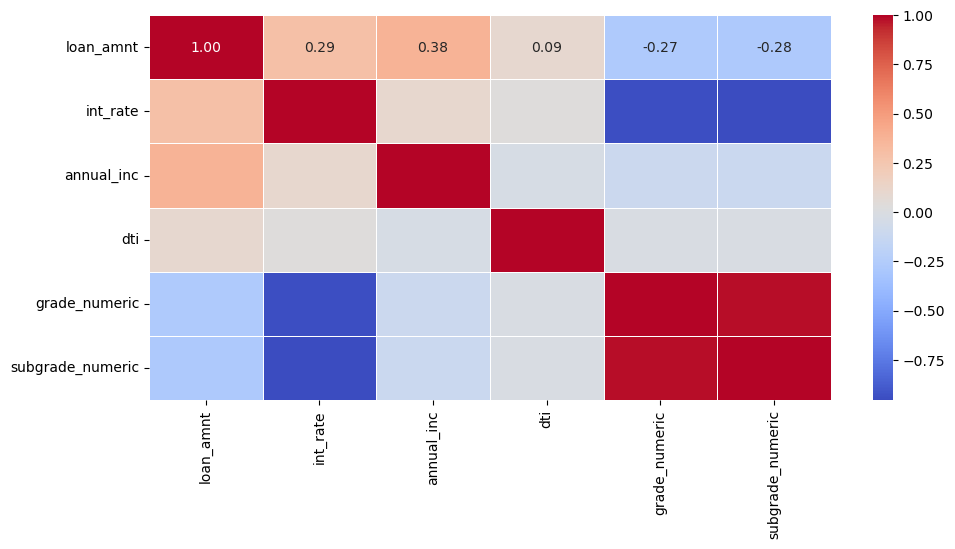

In [691]:
plt.figure(figsize=(11, 5))
sns.heatmap(correlation_matrix_for_charged_off, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)

# With the negative correlation between loan amount and grade, 
# We see a trend where the lower loan amounts that are associated with better grades are on the defaulter list.

# A correlation of 0.37 between the loan amount and annual income in the defaulter list indicates a moderate positive relationship. 
# This suggests that as the annual income of the defaulters increases, the loan amount also tends to increase, 
# although the relationship is not very strong.

# The strong positive correlation between grade and interest rate indicates that higher loan grades
# are strongly associated with lower interest rates among defaulters.

Conclusions